In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import schema

/var/folders/gg/70980zzd0lq3gkyk7923jx8c0000gq/T/ipykernel_47982/1826793987.py:19: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  by_size_df = metrics_df.groupby(["name", "data_size"], as_index=False).mean(numeric_only=False)


<Axes: title={'center': 'Number of Nodes Per Level Across N'}, xlabel='Data Size', ylabel='Number of Nodes'>

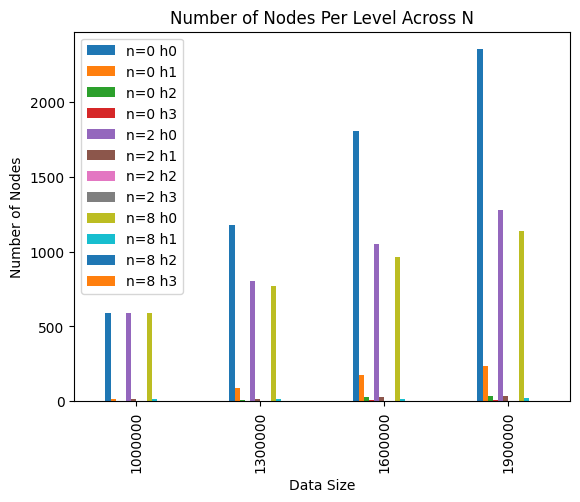

In [2]:
# Results of the inserts_vs_index_power experiment

metrics_df = pd.read_csv("data/eps32_metrics_data.csv", index_col=False)

names = metrics_df["name"].unique()

REASONABLE_MAX_HEIGHT = 4
hs = []
for height in range(REASONABLE_MAX_HEIGHT):
    def get_count(s: str):
        TS = schema.TreeShape.decode(s)
        if len(TS.level_sizes) > height:
            return TS.level_sizes[height]
        return 0
    hs.append(f"h{height}")
    metrics_df[f"h{height}"] = metrics_df["tree_shape"].apply(get_count)


by_size_df = metrics_df.groupby(["name", "data_size"], as_index=False).mean(numeric_only=False)

dss = by_size_df["data_size"].unique()
plottable = []
columns = ["Data Size"] + list(np.array([[f"n={n} {h}" for h in hs] for n in [0, 2, 8]]).flatten())

for ds in dss:
    data = by_size_df[by_size_df["data_size"] == ds]
    adding = [ds]
    def construct(row):
        for h in hs:
            adding.append(row[h])
    data.apply(construct, axis=1)
    plottable.append(adding)

plottable = plottable[::3]

plot_df = pd.DataFrame(plottable, columns=columns)
plot_df.plot(x="Data Size", kind="bar", xlabel="Data Size", ylabel="Number of Nodes", title="Number of Nodes Per Level Across N")


[1000000]
[1100000]
[1200000]
[1300000]
[1400000]
[1500000]
[1600000]
[1700000]
[1800000]
[1900000]
[2000000]
[[1000000, 0.0, 0.0, 0.0], [1100000, 0.19723865877712032, 0.07127583749109052, 0.053628888094386845], [1200000, 0.3611846857693234, 0.09536297532483014, 0.05951672419950007], [1300000, 0.4717409053796607, 0.11636233440744717, 0.09830205540661305], [1400000, 0.6266394637132031, 0.12195121951219512, 0.07867257903018166], [1500000, 0.680685547587213, 0.10746910263299302, 0.08337800011911144], [1600000, 0.7144719687092568, 0.12280611983830528, 0.10721944245889921], [1700000, 0.7449725776965266, 0.11634150706998386, 0.1026419136022849], [1800000, 0.8169403349048936, 0.11143835071240946, 0.11104941699056078], [1900000, 0.8753616818664616, 0.11836017359492129, 0.11417561636992901], [2000000, 0.9452553525501852, 0.11736323922540264, 0.11360685536224358]]


/var/folders/gg/70980zzd0lq3gkyk7923jx8c0000gq/T/ipykernel_47982/2251514843.py:15: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  by_size_df = metrics_df.groupby(["name", "data_size"], as_index=False).mean(numeric_only=False)


<Axes: title={'center': 'Percentage of Buffer Reads for Same Workload'}, xlabel='Data Size', ylabel='Percentage of Reads that go to Buffer (%)'>

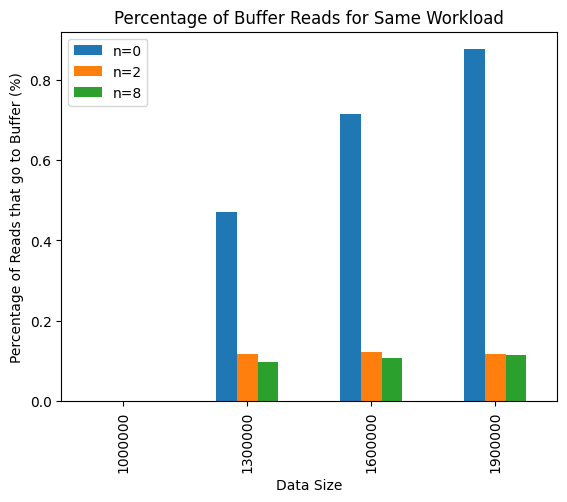

In [3]:
# Results of the inserts_vs_index_power experiment

metrics_df = pd.read_csv("data/eps128_metrics_data.csv", index_col=False)

names = metrics_df["name"].unique()

for name in ["in_data", "in_buffer"]:
    def get_read_proportion(s: str):
        RP = schema.ReadProfile.decode(s)
        if name == "in_data":
            return RP.num_data
        return RP.num_buffer
    metrics_df[name] = metrics_df["read_profile"].apply(get_read_proportion)

by_size_df = metrics_df.groupby(["name", "data_size"], as_index=False).mean(numeric_only=False)

dss = by_size_df["data_size"].unique()
plottable = []
columns = ["Data Size", "n=0", "n=2", "n=8"]

for ds in dss:
    data = by_size_df[by_size_df["data_size"] == ds]
    adding = [ds]
    def construct(row):
        adding.append(row["in_buffer"] / (row["in_data"] + row["in_buffer"]) * 100)
    print(adding)
    data.apply(construct, axis=1)
    plottable.append(adding)

print(plottable)

plottable = plottable[::3]

plot_df = pd.DataFrame(plottable, columns=columns)
plot_df.plot(x="Data Size", kind="bar", xlabel="Data Size", ylabel="Percentage of Reads that go to Buffer (%)", title="Percentage of Buffer Reads for Same Workload")


/var/folders/gg/70980zzd0lq3gkyk7923jx8c0000gq/T/ipykernel_47982/2283753590.py:19: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  by_size_df = metrics_df.groupby(["name", "data_size"], as_index=False).mean(numeric_only=False)


<Axes: title={'center': 'Number of Splits/Merges that Reached a Given Height'}, xlabel='Data Size', ylabel='Number of Splits'>

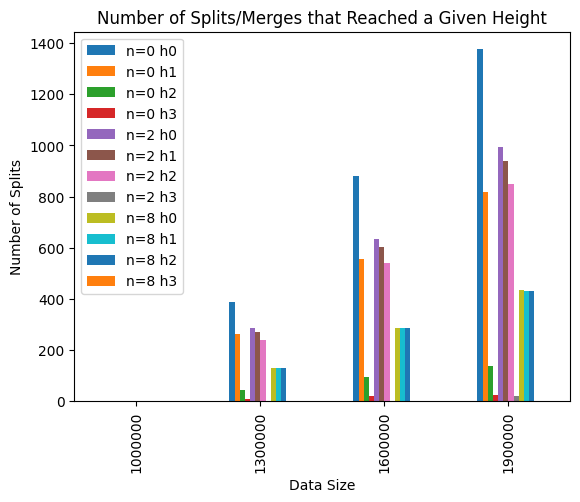

In [5]:
# Results of the inserts_vs_index_power experiment

metrics_df = pd.read_csv("data/eps32_metrics_data.csv", index_col=False)

names = metrics_df["name"].unique()

REASONABLE_MAX_HEIGHT = 4
hs = []
for height in range(REASONABLE_MAX_HEIGHT):
    def get_count(s: str):
        SH = schema.SplitHistory.decode(s)
        if len(SH.splits_by_level) > height:
            return SH.splits_by_level[height]
        return 0
    hs.append(f"h{height}")
    metrics_df[f"h{height}"] = metrics_df["split_history"].apply(get_count)


by_size_df = metrics_df.groupby(["name", "data_size"], as_index=False).mean(numeric_only=False)

dss = by_size_df["data_size"].unique()
plottable = []
columns = ["Data Size"] + list(np.array([[f"n={n} {h}" for h in hs] for n in [0, 2, 8]]).flatten())

for ds in dss:
    data = by_size_df[by_size_df["data_size"] == ds]
    adding = [ds]
    def construct(row):
        for h in hs:
            adding.append(row[h])
    data.apply(construct, axis=1)
    plottable.append(adding)

plottable = plottable[::3]

plot_df = pd.DataFrame(plottable, columns=columns)
plot_df.plot(x="Data Size", kind="bar", xlabel="Data Size", ylabel="Number of Splits", title="Number of Splits/Merges that Reached a Given Height")


/var/folders/gg/70980zzd0lq3gkyk7923jx8c0000gq/T/ipykernel_47982/1678268330.py:20: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  by_name_df = metrics_df.groupby(["name"], as_index=False).mean(numeric_only=False)


<Axes: title={'center': 'Number of Splits/Merges that Reached a Given Height\n1M initially, 1M inserts'}, xlabel='Type', ylabel='Number of Splits'>

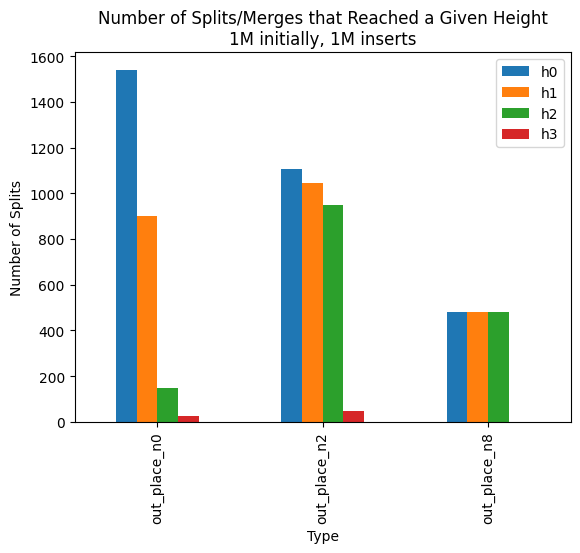

In [16]:
# Results of the inserts_vs_index_power experiment

metrics_df = pd.read_csv("data/eps32_metrics_data.csv", index_col=False)
metrics_df = metrics_df[metrics_df["data_size"] == 2000000]

names = metrics_df["name"].unique()

REASONABLE_MAX_HEIGHT = 4
hs = []
for height in range(REASONABLE_MAX_HEIGHT):
    def get_count(s: str):
        SH = schema.SplitHistory.decode(s)
        if len(SH.splits_by_level) > height:
            return SH.splits_by_level[height]
        return 0
    hs.append(f"h{height}")
    metrics_df[f"h{height}"] = metrics_df["split_history"].apply(get_count)


by_name_df = metrics_df.groupby(["name"], as_index=False).mean(numeric_only=False)

names = by_size_df["name"].unique()
plottable = []
columns = ["Name"] + [f"{h}" for h in hs]

for name in names:
    data = by_name_df[by_name_df["name"] == name]
    adding = [name]
    def construct(row):
        for h in hs:
            adding.append(row[h])
    data.apply(construct, axis=1)
    plottable.append(adding)

plot_df = pd.DataFrame(plottable, columns=columns)
plot_df.plot(x="Name", kind="bar", xlabel="Type", ylabel="Number of Splits", title="Number of Splits/Merges that Reached a Given Height\n1M initially, 1M inserts")
